In [2]:
# Allows for .py files to automatically reload.
%reload_ext autoreload
%autoreload 2

In [3]:
# Import external libraries
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

# Import created files
import cleaners as clean

In [6]:
df_usa = pd.read_csv("../../data/youtube/video_csvs/USvideos.csv")
us_json_file = "../../data/youtube/categories/US_category_id.json"
df_usa = clean.id_to_category_name(df_usa, us_json_file)

In [7]:
df_usa['country'] = "US"

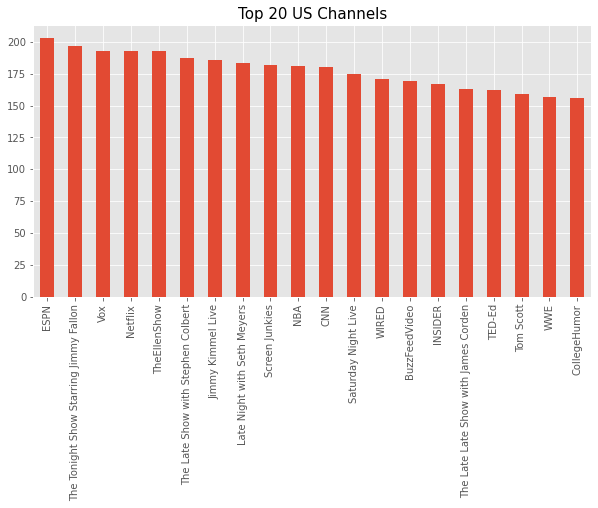

In [8]:
df_usa['channel_title'].value_counts().head(20).plot(kind = 'bar', figsize = (10, 5))
plt.title("Top 20 US Channels", size = 15)
plt.show()

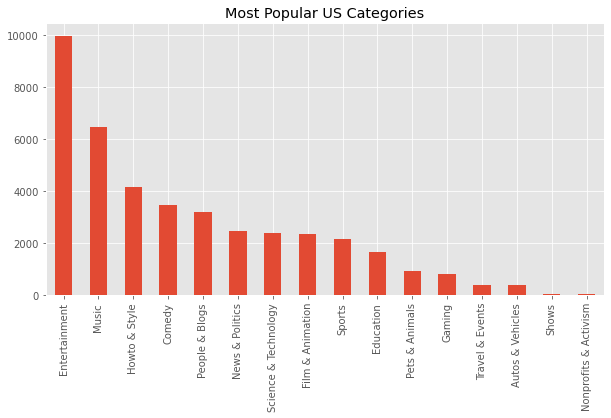

In [9]:
df_usa['category_id'].value_counts().plot(kind = 'bar', figsize = (10, 5))
plt.title("Most Popular US Categories")
plt.show()

In [189]:
# Create each country DataFrame, so that pd.concat can create one .csv file with every DataFrame.
# Japan, Korea, Russia, and Mexico not included due to encoding issues.

df_ca = pd.read_csv("video_csvs/CAvideos.csv")
ca_json_file = "categories/CA_category_id.json"
df_ca = clean.id_to_category_name(df_ca, ca_json_file)
df_ca['country'] = "CA"
df_ca['trending_date'] = pd.to_datetime(df_ca['trending_date'], format='%y.%d.%m')

df_de = pd.read_csv("video_csvs/DEvideos.csv")
de_json_file = "categories/DE_category_id.json"
df_de = clean.id_to_category_name(df_de, de_json_file)
df_de['country'] = "DE"
df_de['trending_date'] = pd.to_datetime(df_de['trending_date'], format='%y.%d.%m')

df_fr = pd.read_csv("video_csvs/FRvideos.csv")
fr_json_file = "categories/FR_category_id.json"
df_fr = clean.id_to_category_name(df_fr, fr_json_file)
df_fr['country'] = "FR"
df_fr['trending_date'] = pd.to_datetime(df_fr['trending_date'], format='%y.%d.%m')

df_gb = pd.read_csv("video_csvs/GBvideos.csv")
gb_json_file = "categories/FR_category_id.json"
df_gb = clean.id_to_category_name(df_gb, gb_json_file)
df_gb['country'] = "GB"
df_gb['trending_date'] = pd.to_datetime(df_gb['trending_date'], format='%y.%d.%m')

df_in = pd.read_csv("video_csvs/INvideos.csv")
in_json_file = "categories/IN_category_id.json"
df_in = clean.id_to_category_name(df_in, in_json_file)
df_in['country'] = "IN"
df_in['trending_date'] = pd.to_datetime(df_in['trending_date'], format='%y.%d.%m')

In [190]:
pd.concat([df_usa, df_ca, df_de, df_fr, df_gb, df_in]).to_csv("merged_countries")

In [10]:
merged_countries = pd.read_csv("../../data/youtube/video_csvs/merged_countries.csv")

In [11]:
merged_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242232 entries, 0 to 242231
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              242232 non-null  object 
 1   video_id                240108 non-null  object 
 2   trending_date           239662 non-null  object 
 3   title                   239662 non-null  object 
 4   channel_title           239662 non-null  object 
 5   category_id             239662 non-null  object 
 6   publish_time            239662 non-null  object 
 7   tags                    239662 non-null  object 
 8   views                   239662 non-null  float64
 9   likes                   239662 non-null  float64
 10  dislikes                239662 non-null  float64
 11  comment_count           239662 non-null  float64
 12  thumbnail_link          239662 non-null  object 
 13  comments_disabled       239662 non-null  object 
 14  ratings_disabled    

In [12]:
merged_countries.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
merged_countries.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57527.0,2966.0,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.0,97185.0,6146.0,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146033.0,5339.0,8181.0,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.0,10172.0,666.0,2146.0,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.0,132235.0,1989.0,17518.0,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US


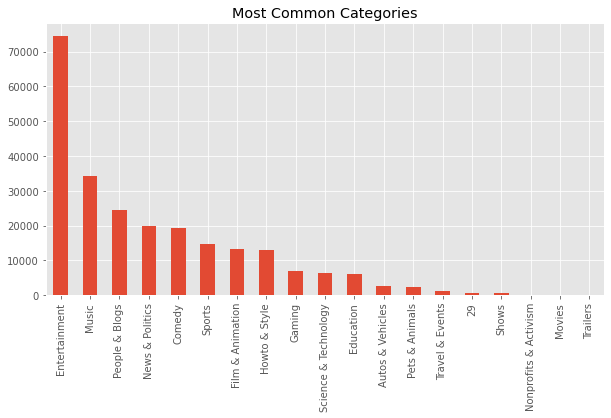

In [14]:
merged_countries['category_id'].value_counts().plot(kind = 'bar', figsize = (10, 5))
plt.title("Most Common Categories")
plt.show()

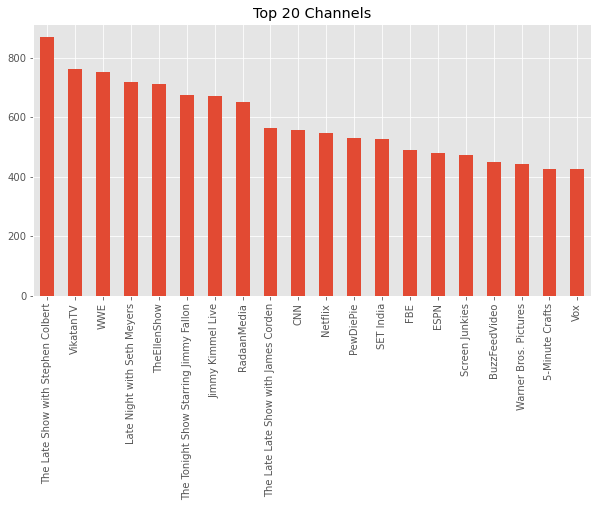

In [15]:
merged_countries['channel_title'].value_counts().head(20).plot(kind = 'bar', figsize = (10, 5))
plt.title("Top 20 Channels")
plt.show()

In [16]:
merged_countries['video_id'].isnull().sum()

2124

In [17]:
merged_countries.isna().sum()

video_id                   2124
trending_date              2570
title                      2570
channel_title              2570
category_id                2570
publish_time               2570
tags                       2570
views                      2570
likes                      2570
dislikes                   2570
comment_count              2570
thumbnail_link             2570
comments_disabled          2570
ratings_disabled           2570
video_error_or_removed     2570
description               10073
country                    3016
dtype: int64

In [18]:
merged_countries.dropna(how = 'all', inplace = True)

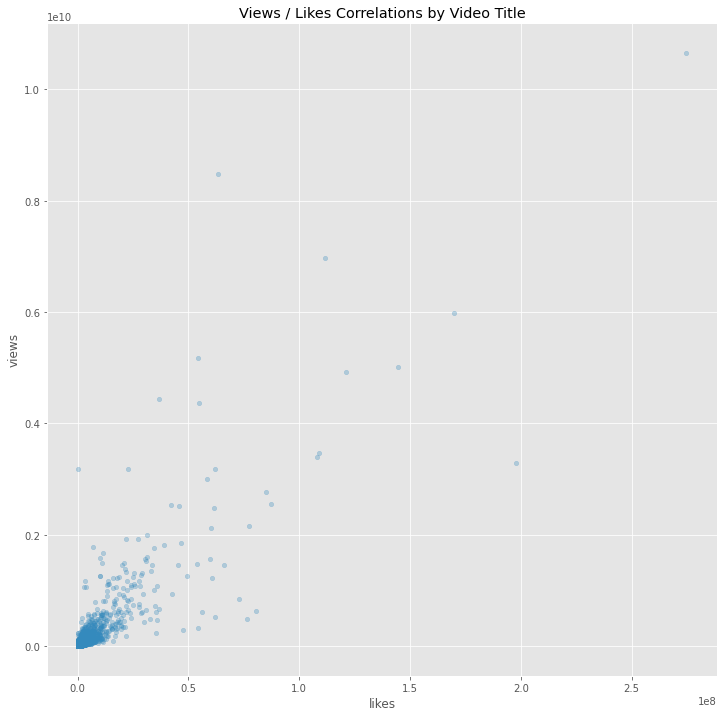

In [21]:
merged_countries.groupby('title').sum().sort_values('views', ascending = False).plot(
    kind = "scatter", x = 'likes', y = 'views', alpha = 0.3, figsize = (12, 12)
)

plt.title("Views / Likes Correlations by Video Title")
plt.show()

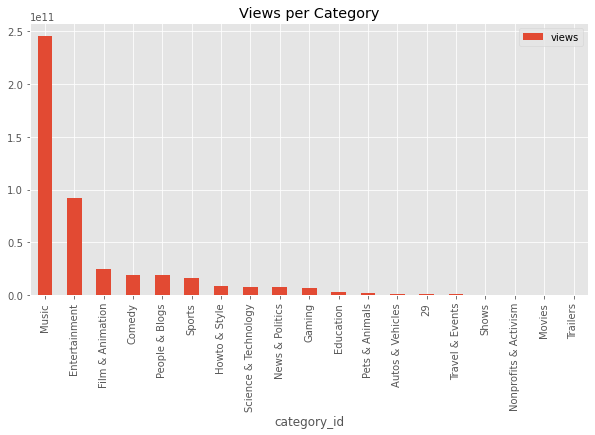

In [22]:
merged_countries.groupby('category_id').sum().sort_values('views', ascending = False).plot(
    kind = 'bar', y = 'views', figsize = (10,5)
)

plt.title("Views per Category")
plt.show()

<AxesSubplot:>

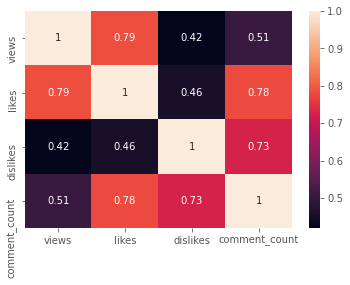

In [23]:
correlation_list = ['views', 'likes', 'dislikes', 'comment_count']
heatmap_data = merged_countries[correlation_list].corr()

sns.heatmap(heatmap_data, annot = True)
# Larger numbers imply a greater correlation